# Закрпеление знаний

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data/churn.csv', sep=',')
churm_df = data.copy()
churm_df = churm_df.drop('RowNumber', axis=1)
churm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


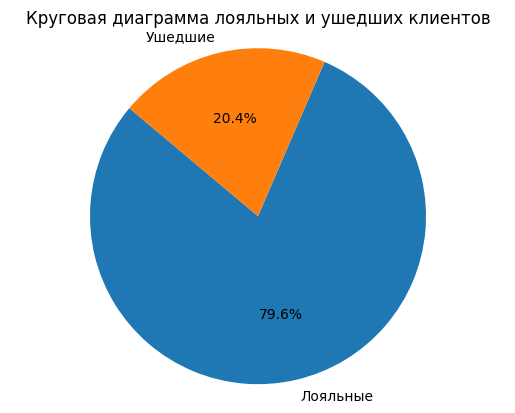

In [33]:
# 9.1
exit_counts = churm_df['Exited'].value_counts()

# Создание графика
plt.pie(exit_counts, labels=['Лояльные', 'Ушедшие'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равные пропорции, чтобы диаграмма была круглой
plt.title('Круговая диаграмма лояльных и ушедших клиентов')
plt.show()

Вывод: На диаграмме видно что процент лояльных клиентов гораздо больше ушедших, а именно 20.4% Ушедших на 79.6% лояльных

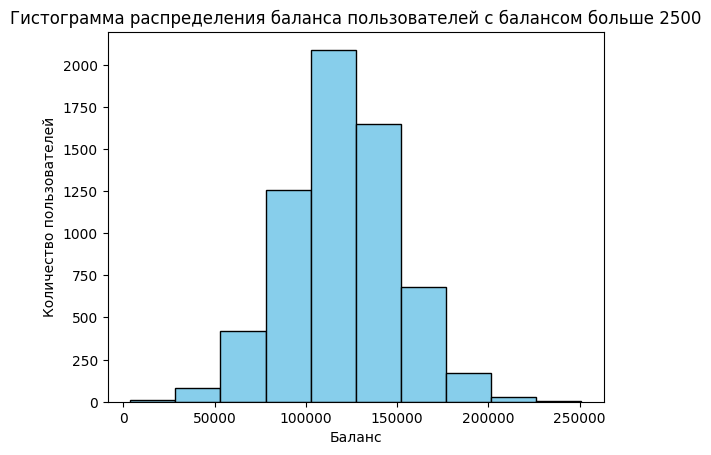

In [38]:
# 9.2

filtered_df = churm_df[churm_df['Balance'] > 2500]

# Создание гистограммы распределения баланса
plt.hist(filtered_df['Balance'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения баланса пользователей с балансом больше 2500')
plt.show()

Вывод: Больше всего пользователей чей баланс находится между 100.000$ и 150.000$ 

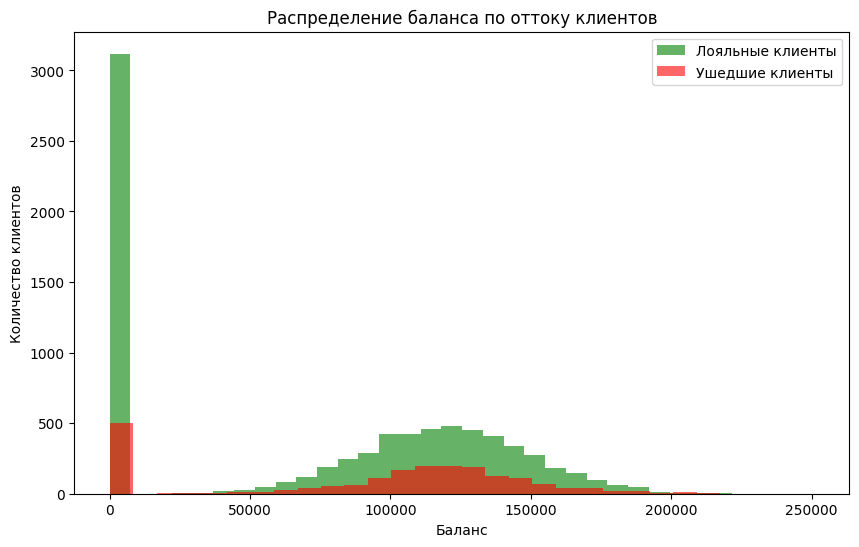

In [39]:
# 9.3

# Разделение данных на ушедших и лояльных клиентов
churned_clients = churm_df[churm_df['Exited'] == 1]
loyal_clients = churm_df[churm_df['Exited'] == 0]

# Создание гистограмм для баланса ушедших и лояльных клиентов
plt.figure(figsize=(10, 6))
plt.hist(loyal_clients['Balance'], bins=30, color='green', alpha=0.6, label='Лояльные клиенты')
plt.hist(churned_clients['Balance'], bins=30, color='red', alpha=0.6, label='Ушедшие клиенты')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.legend()
plt.title('Распределение баланса по оттоку клиентов')
plt.show()

Вывод: У меня есть две версии.
 Первая: При первом взгляде распеределине выглядит пропорциональным. Что я имю ввиду: Больше всего ушедших клиентов с балансом 0, но там и больше всего лояльных. На втором месте по ушедшим клиентам с балансом от 100000 до 150000, но там также и второе место среди лояльных. Я предполагаю, что баланс не является единственным фактором, влияющим на принятие решения клиентом об оттоке из банка.
 Вторая: если про клиентов с балансом можно примерно сказать, что колличсетво лояльным это 2/3, а колличество ушедших 1/3. То при взгляде на клиентов с балансом 0, процент лояльных будет куда больше. Могу предположить что отток клиентов связан с неудовлитварительными условиями по накопительному счёту. 

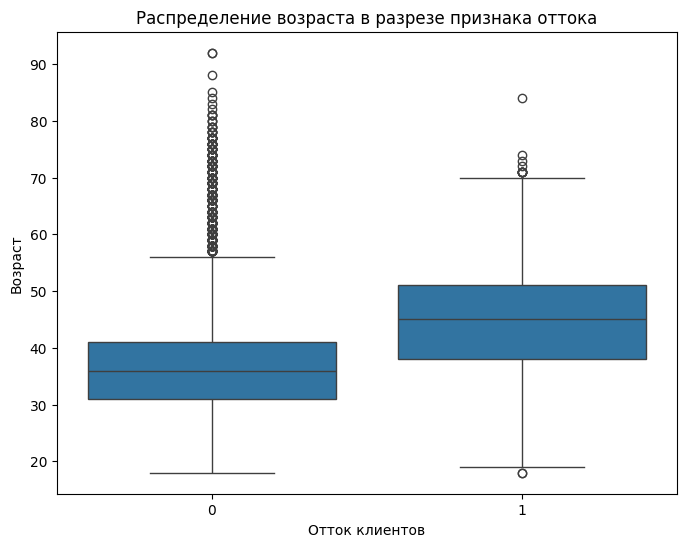

In [46]:
# 9.4


import seaborn as sns


# Создание графика для распределения возраста по оттоку
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=churm_df)
plt.xlabel('Отток клиентов')
plt.ylabel('Возраст')
plt.title('Распределение возраста в разрезе признака оттока')
plt.show()

Больше всего выбросов наблюдается у возрастной группы 30-40 лояльных клиентов 

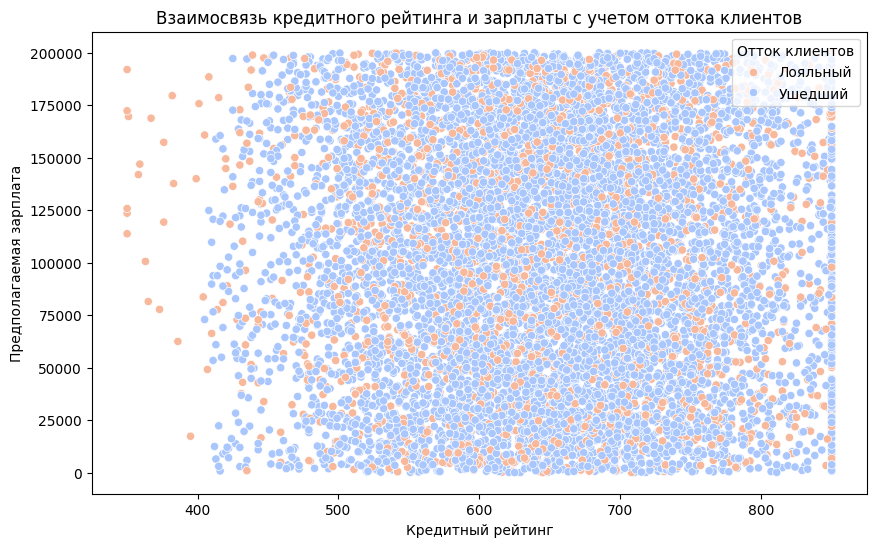

In [49]:
# 9.5 


plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=churm_df, palette='coolwarm')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.title('Взаимосвязь кредитного рейтинга и зарплаты с учетом оттока клиентов')
plt.legend(title='Отток клиентов', loc='upper right', labels=['Лояльный', 'Ушедший'])
plt.show()

Явной взаимосвязи не вижу

C:\Users\Ярослав\AppData\Local\Temp\ipykernel_18384\1793389423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='pastel')


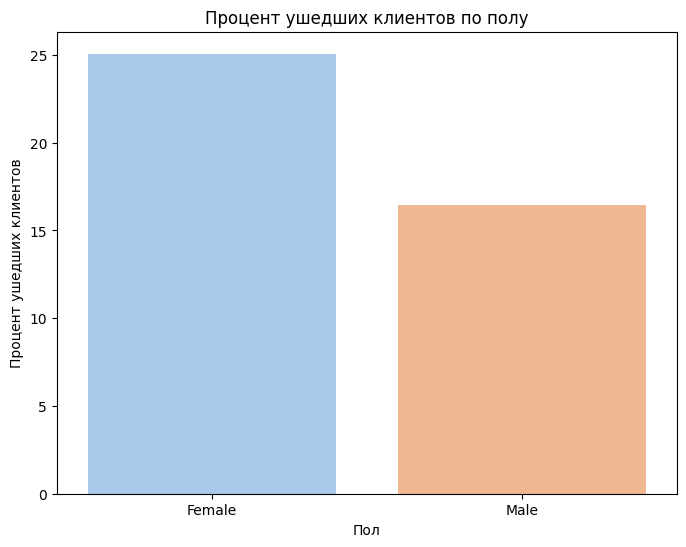

In [50]:
#9.6

gender_churn_rate = churm_df.groupby('Gender')['Exited'].mean() * 100

# Создание графика для процента ушедших клиентов по полу
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='pastel')
plt.xlabel('Пол')
plt.ylabel('Процент ушедших клиентов')
plt.title('Процент ушедших клиентов по полу')
plt.show()

Чаще уходят женщины

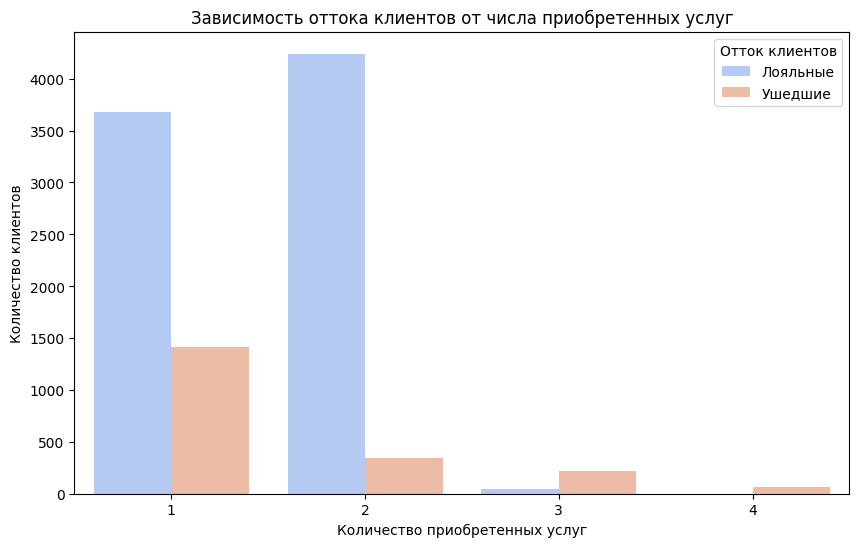

In [51]:
# 9.7

# Создание многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=churm_df, palette='coolwarm')
plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Количество клиентов')
plt.title('Зависимость оттока клиентов от числа приобретенных услуг')
plt.legend(title='Отток клиентов', labels=['Лояльные', 'Ушедшие'])
plt.show()

Самое благоприятное соотношение при 2 приобретённых услугах. При 3 колличество ушедних больше чем лояльных.

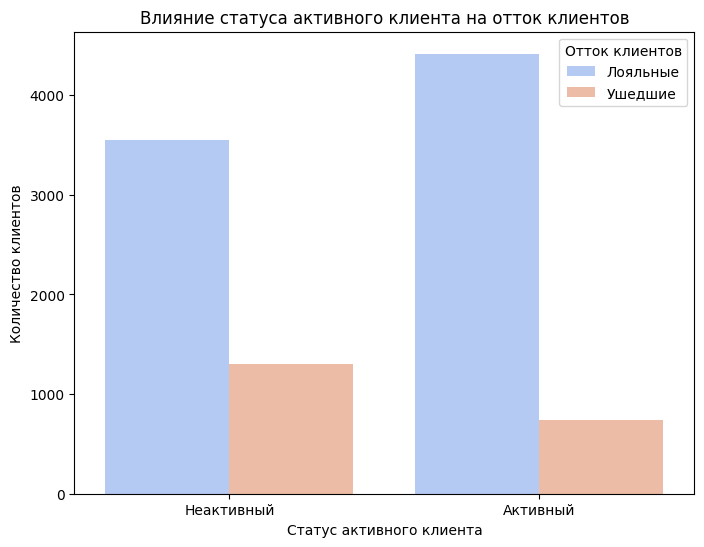

In [52]:
# 9.8


# Создание столбчатой диаграммы для влияния статуса активного клиента на отток клиентов
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=churm_df, palette='coolwarm')
plt.xlabel('Статус активного клиента')
plt.ylabel('Количество клиентов')
plt.title('Влияние статуса активного клиента на отток клиентов')
plt.legend(title='Отток клиентов', labels=['Лояльные', 'Ушедшие'])
plt.xticks(ticks=[0, 1], labels=['Неактивный', 'Активный'])
plt.show()

Предолжения: Разработка и проведение программ и мероприятий для мотивации неактивных клиентов к более активному использованию услуг банка.
Улучшение обслуживания. Повышение качества обслуживания и коммуникации с клиентами.

In [28]:
# 9.9

import plotly
import plotly.express as px
print(plotly.__version__)

country_churn = churm_df.groupby('Geography')['Exited'].sum().reset_index()

fig = px.choropleth(country_churn, 
                    locations='Geography',
                    locationmode='country names',
                    color='Exited',
                    color_continuous_scale='reds',
                    range_color=(0, country_churn['Exited'].max() + 200),
                    labels={'Exited': 'Churn Sum'},
                    title='Churn Sum by Country')

fig.show()

# fig.show()



5.20.0


Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Максимальный отток клиентов наблюдается в Германии, Франция отстаёт всего на 4 клиента 

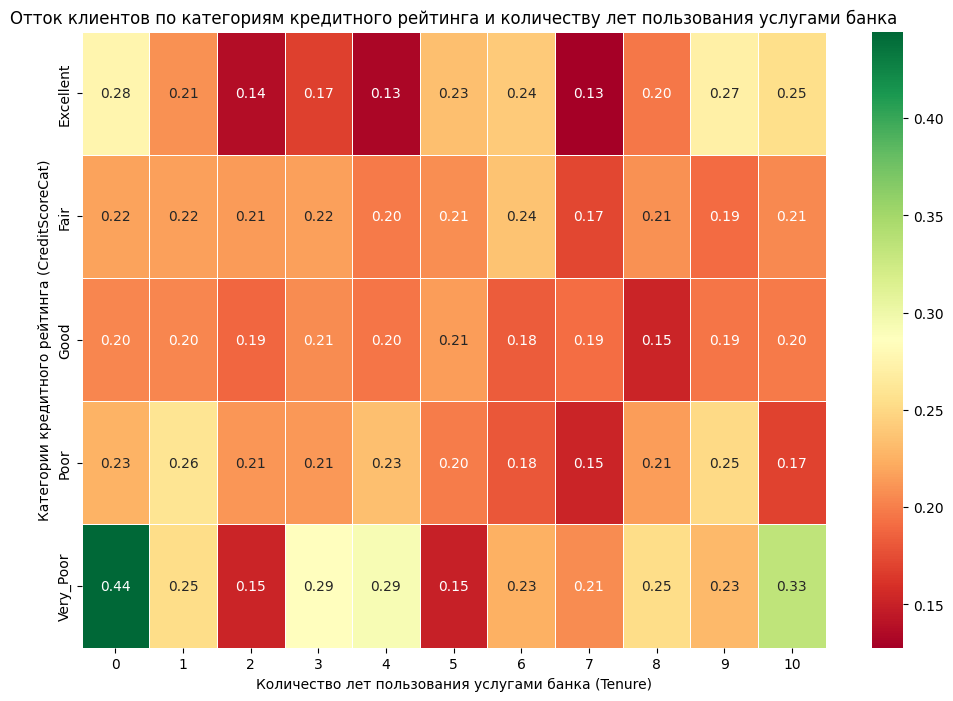

In [30]:
# 9.10

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churm_df['CreditScoreCat'] = churm_df['CreditScore'].apply(get_credit_score_cat).astype('category')


pivot_table = churm_df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')



import seaborn as sns
import matplotlib.pyplot as plt

# Создаем тепловую карту с аннотацией
plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)
plt.title('Отток клиентов по категориям кредитного рейтинга и количеству лет пользования услугами банка')
plt.xlabel('Количество лет пользования услугами банка (Tenure)')
plt.ylabel('Категории кредитного рейтинга (CreditScoreCat)')
plt.show()

Чаще всего уходят клиенты уровня Excellent 2, 3, 4, 7 лет пользования
Также немалый оттоу у клиентов Good эта полоса кажется самой ораньжевой.
Минимальный отток у клиентов Very_poor 0 лет пользования банком